In [108]:
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split
import data_generation as dg
from metrics import ece
from metrics import true_ece
from metrics import fce
from metrics import balance_score
import scipy.stats as st
import numpy as np
import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
dist1_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist1_2 = st.multivariate_normal(mean=[6, -6], cov=1.7, allow_singular=True)

In [110]:
dist2_1 = st.multivariate_normal(mean=[-10, 10], cov=1, allow_singular=True)
dist2_2 = st.multivariate_normal(mean=[-6, -6], cov=1.7, allow_singular=True)

In [111]:
class_object1 = dg.ClassObject([dist1_1, dist1_2], None)
class_object2 = dg.ClassObject([dist2_1, dist2_2], None)

In [112]:
test = dg.DataGeneration([class_object1, class_object2], n_uninformative_features=0, title="dg-test")

In [113]:
n_samples_per_class_and_dist = 1000

samples, labels = test.generate_data(n_samples_per_class_and_dist)

<module 'matplotlib.pyplot' from 'D:\\ProgrammingProjects\\PyCharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

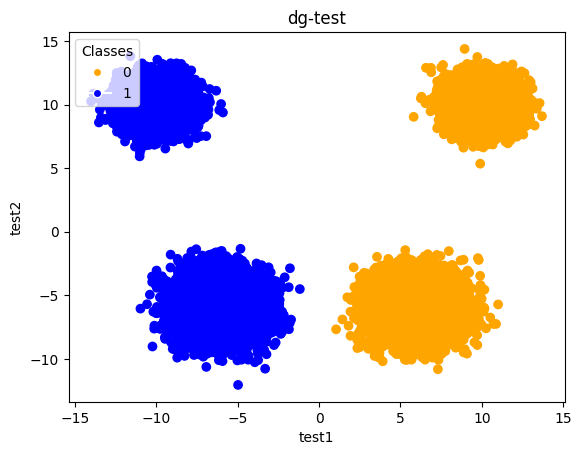

In [114]:
colormap = np.array(['orange', 'blue', 'red'])

test.scatter2d(0, 1, colormap=colormap, savePath="./plots/dg-test", axis1_label="test1", axis2_label="test2")

In [115]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=.2)

In [116]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [117]:
model = tf.keras.Sequential()

In [118]:
model.add(tf.keras.layers.Dense(50, activation="tanh"))

In [119]:
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [120]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [121]:
model.fit(X_train.reshape(-1, 2), y_train, epochs=15, batch_size=1000)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0764
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0763e-04 
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.4682e-04 
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.4507e-05 
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9800e-05 
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9560e-05 
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.4294e-05
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3024e-05 
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7132e-05 
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0207e-05 
Epoch 12/15
32/32 ━━━━━━━━━━━━

In [122]:
model.evaluate(X_test.reshape(-1, 2), y_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 1.0000 - loss: 1.6329e-05


[1.7727514205034822e-05, 1.0]

In [123]:
predictions = model.predict(X_test.reshape(-1,2))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


In [124]:
y_test = np.argmax(y_test, axis=1)

In [125]:
p_test_true = np.array([[test.cond_prob(x, k=0), test.cond_prob(x, k=1)] for x in X_test])

In [126]:
true_ece.true_ece(predictions, p_test_true)

array([1.75555252e-05, 1.75556543e-05])

In [127]:
true_ece.calibration_error_summary(predictions, y_test, n_bins=np.array([10, 20, 50]))

(array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0.3125, 0.3125, 0.3   ]),
 0.0,
 0.0)